In [1]:
%reset -f
import glob, os, sys, io
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from wavhandler import *
from utils import *

import logging
logger = logging.getLogger()
logger.propagate = False
logger.setLevel(logging.ERROR)
np.random.seed(0)

smpl = 5
aedes = WavHandler('/home/yannis/data/insects/Potamitis/Wingbeats/Aedes', sample_size=smpl, recursive=True)
data, _ = read_simple(aedes.wav_filenames)

ORIGINAL SIGNAL


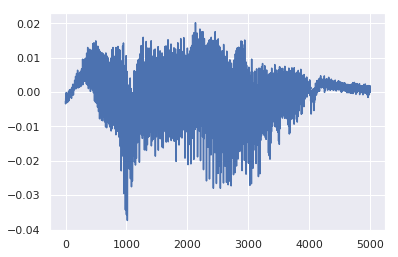

In [18]:
import more_itertools as mit

sig = data[:,1]
window = 300
intens_threshold = 0.004
offset = 250
sigseries = pd.Series(sig.reshape(-1,)) # fixing peculiarities
print('ORIGINAL SIGNAL')
sigseries.plot()

## Rolling mean of the absolute signal with the chosen window

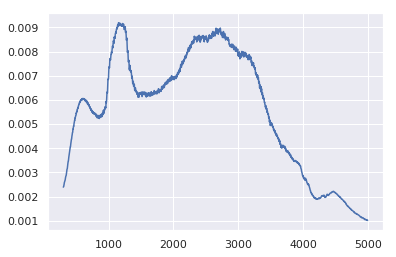

In [19]:
rolling_avg = np.abs(sigseries).rolling(window).mean() # rolling average
rolling_avg.plot()

## Thresholded rolling mean from above 

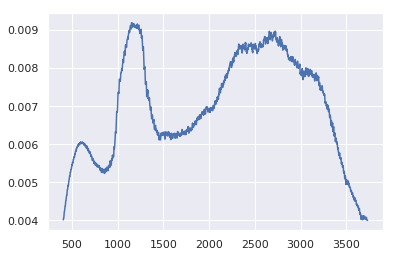

In [20]:
rolling_avg_thd = rolling_avg[rolling_avg > intens_threshold] # values above threshold
rolling_avg_thd.plot()

## Find largest continuous positive interval above threshold

In [21]:
if len(rolling_avg_thd) > 256:
    iterable = rolling_avg_thd.index.tolist()
    groups = [list(group) for group in mit.consecutive_groups(iterable)]
    # Sizes of the groups
    group_lens = pd.Series([len(groups[i]) for i in range(len(groups))])
    # Index of largest group
    lrgst_group_idx = group_lens.idxmax()
    # The first element of the largest group is where we start cropping
    crop_start = groups[lrgst_group_idx][0]
    # The last element of the largest group is where we stop cropping
    crop_end = groups[lrgst_group_idx][-1]

    sig_cropped = sigseries.iloc[  crop_start -offset : crop_end - offset]

# Original signal

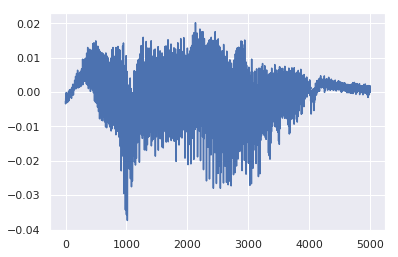

In [22]:
plt.plot(sig)

# Cropped signal

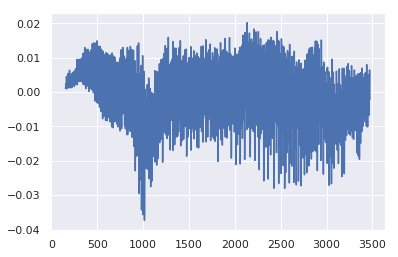

In [23]:
sig_cropped.plot()